In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import savgol_filter
from numpy import diff
from scipy.optimize import curve_fit

# Read in data

In [2]:
arsR_MG = pd.read_csv('./arsR-MG_gradient.csv',index_col=0)
arsR_MG = arsR_MG.T
arsR_ALE2 = pd.read_csv('./arsR-ALE2_gradient.csv',index_col=0)
arsR_ALE2 = arsR_ALE2.T

# Graph gradient generated from dye

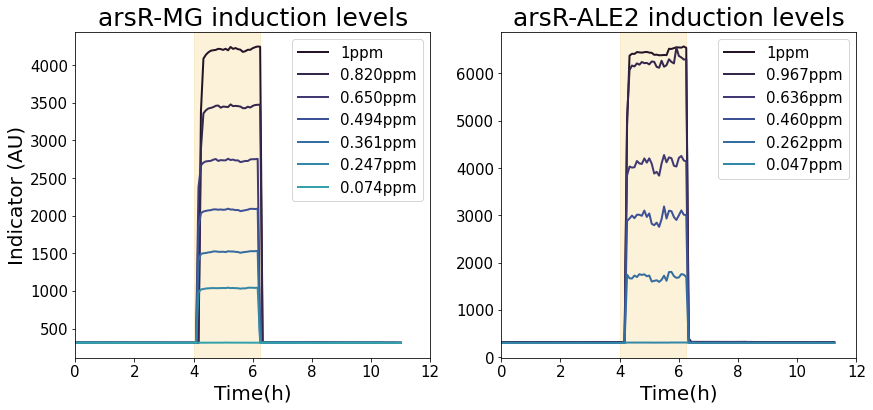

In [3]:
# Set up figure
fig, axes = plt.subplots(1, 2, facecolor='white')
fig.set_figheight(6)
fig.set_figwidth(14)

# Color palette for multiple inducer concentrations
custom_palette = sns.color_palette("mako", n_colors=10)

# ------------------------------------------------------------------
# Plot 1: arsR-MG induction
# ------------------------------------------------------------------
# Select RED (RFP) columns
target_string = 'RED'
arsR_MG_rfp = arsR_MG[[col for col in arsR_MG.columns if target_string in col]]

# Axis and x-ticks
ax = axes[0]
custom_xticks = ((arsR_MG.index.values.astype(int) - 1) * 5) / 60
labels = ['1ppm', '0.820ppm', '0.650ppm', '0.494ppm', '0.361ppm', '0.247ppm', '0.074ppm']

# Plot each inducer concentration
for i in range(7):
    ax.plot(
        custom_xticks,
        arsR_MG_rfp[arsR_MG_rfp.columns[i]].values,
        label=labels[i],
        linewidth=2,
        color=custom_palette[i]
    )

# Highlight induction region
highlight_start = 4
highlight_end = 6.25
ax.axvspan(highlight_start, highlight_end, color='#F4BB44', alpha=0.2)

# Axis customization
ax.set_title('arsR-MG induction levels', size=25)
ax.set_xlim(0, 12)
ax.set_xlabel('Time(h)', size=20, labelpad=4)
ax.set_ylabel('Indicator (AU)', size=20, labelpad=4)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.legend(loc='upper right', prop={'size': 15})

# ------------------------------------------------------------------
# Plot 2: arsR-ALE2 induction
# ------------------------------------------------------------------
# Select RED (RFP) columns
arsR_ALE2_rfp = arsR_ALE2[[col for col in arsR_ALE2.columns if target_string in col]]

# Axis and x-ticks
ax = axes[1]
custom_xticks = ((arsR_ALE2.index.values.astype(int) - 1) * 5) / 60
labels = ['1ppm', '0.967ppm', '0.636ppm', '0.460ppm', '0.262ppm', '0.047ppm']

# Plot each inducer concentration
for i in range(6):
    ax.plot(
        custom_xticks,
        arsR_ALE2_rfp[arsR_ALE2_rfp.columns[i]].values,
        label=labels[i],
        linewidth=2,
        color=custom_palette[i]
    )

# Highlight induction region
ax.axvspan(highlight_start, highlight_end, color='#F4BB44', alpha=0.2)

# Axis customization
ax.set_title('arsR-ALE2 induction levels', size=25)
ax.set_xlim(0, 12)
ax.set_xlabel('Time(h)', size=20, labelpad=4)
ax.set_ylabel(' ', size=20, labelpad=4)  # intentionally blank
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.legend(loc='upper right', prop={'size': 15})


# Graph responses to concentration gradient

/var/folders/r4/n0pt1c0x7ql2s2xvp0l_fsl00000gn/T/ipykernel_77100/4127845903.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shifted_y = arsR_MG_gfp[cols].mean(axis=1) - arsR_MG_gfp[cols].mean(axis=1)[0]
/var/folders/r4/n0pt1c0x7ql2s2xvp0l_fsl00000gn/T/ipykernel_77100/4127845903.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shifted_y = arsR_MG_gfp[cols].mean(axis=1) - arsR_MG_gfp[cols].mean(axis=1)[0]
/var/folders/r4/n0pt1c0x7ql2s2xvp0l_fsl00000gn/T/ipykernel_77100/4127845903.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be 

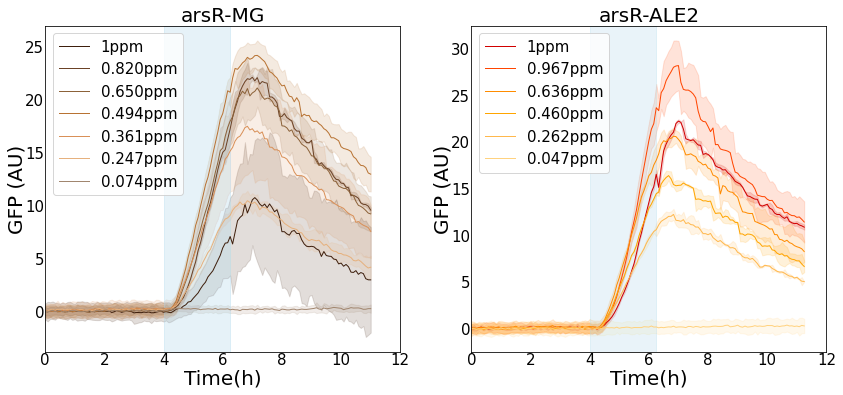

In [4]:
# Set up figure
fig, axes = plt.subplots(1,2, facecolor='white')
fig.set_figheight(6)
fig.set_figwidth(14)
xticks = [0,2,4,6,8,10,12]

# Define color palettes for MG and ALE2 induction traces
MG_palette_10 = [
    '#3E1F0D',  # Dark Coffee Brown
    '#6B4226',  # Burnt Sienna
    '#8C6239',  # Warm Caramel
    '#B87333',  # Copper
    '#D99058',  # Golden Tan
    '#E6B17E',  # Sandstone
    '#C19A6B',  # Khaki Brown
    '#A1866F',  # Taupe
    '#D8CAB8',  # Soft Beige
    '#F5E9DA'   # Pale Cream
]


ALE2_palette_10 = [

    '#D10000',  # Deep Red
    '#FF4500',  # Orange-Red
    '#FF6347',  # Tomato
    '#FF7518',  # Pumpkin Orange
    '#FF8C00',  # Dark Orange
    '#FFA500',  # Pure Orange
    '#FFB84D',  # Vibrant Light Orange
    '#FFD27F',  # Peachy Orange
    '#FFE5A5',  # Light Peach
    '#FFF5CC'   # Pale Peach
]


# ------------------------------------------------------------------
# Plot 1: arsR-MG GFP induction
# ------------------------------------------------------------------
# Select GFP columns (exclude RED/RFP columns)
target_string = 'RED'
nonidx_columns = [col for col in arsR_MG.columns if target_string not in col]
arsR_MG_gfp = arsR_MG[nonidx_columns]

ax = axes[0]
custom_xticks = ((arsR_MG.index.values.astype(int)-1)*5)/60
custom_palette = sns.color_palette("mako",n_colors=10)
labels = ['1ppm', '0.820ppm', '0.650ppm','0.494ppm','0.361ppm','0.247ppm','0.074ppm']

# Plot each induction trace
for i in range(1,9,1):
    if i == 7:
        continue
    # Select columns matching the current index
    cols = [col for col in arsR_MG_gfp if str(i) in col]
    
    # Shift data to start at zero
    shifted_y = arsR_MG_gfp[cols].mean(axis=1) - arsR_MG_gfp[cols].mean(axis=1)[0]
    
    # Plot line
    if i == 8:
        ax.plot(custom_xticks,shifted_y.values, label=labels[i-2],linewidth=1,color=MG_palette_10[i-1])  
    else:
        ax.plot(custom_xticks,shifted_y.values, label=labels[i-1],linewidth=1,color=MG_palette_10[i-1])  
    
    # Add shaded area for standard deviation
    std_dev = arsR_MG_gfp[cols].std(axis=1)
    upper_bound = shifted_y + std_dev
    lower_bound = shifted_y - std_dev   
    ax.fill_between(x=custom_xticks, y1=upper_bound, y2=lower_bound, alpha=0.15, color=MG_palette_10[i-1])
    
    # Highlight induction region
    highlight_start = 4
    highlight_end = 6.25
    ax.axvspan(highlight_start, highlight_end, color='#b6e1f6', alpha=0.05)

# Format axes  
ax.set_title('arsR-MG',size=20, pad=2.5)
ax.set_xlim(0,12)
ax.tick_params(axis='x', labelsize=15, pad=1, length=0)
ax.tick_params(axis='y', labelsize=15, pad=1, length=0)
ax.set_xlabel('Time(h)',size=20,labelpad=1)
ax.set_ylabel('GFP (AU)',size=20,labelpad=-1)
ax.set_xticks(xticks)
ax.legend(loc='upper left', prop={'size': 15})


# ------------------------------------------------------------------
# Plot 2: arsR-ALE2 GFP induction
# ------------------------------------------------------------------
# Select GFP columns (exclude RED/RFP columns)
target_string = 'RED'
nonidx_columns = [col for col in arsR_ALE2.columns if target_string not in col]
arsR_ALE2_gfp = arsR_ALE2[nonidx_columns]

ax = axes[1]
custom_xticks = ((arsR_ALE2.index.values.astype(int)-1)*5)/60
custom_palette = sns.color_palette("mako",n_colors=10)
labels = ['1ppm', '0.967ppm', '0.636ppm','0.460ppm','0.262ppm','0.047ppm']

# Plot each induction trace
for i in range(1,9,1):
    if i == 3:
        continue
    if i == 4: 
        continue
    # Select columns matching the current index
    cols = [col for col in arsR_ALE2_gfp if str(i) in col]
    
    # Shift data to start at zero
    shifted_y = arsR_ALE2_gfp[cols].mean(axis=1) - arsR_ALE2_gfp[cols].mean(axis=1)[0]
    
    # Plot line
    if i > 4:
        ax.plot(custom_xticks,shifted_y.values, label=labels[i-3],linewidth=1,color=ALE2_palette_10[i-1])  
    else:
        ax.plot(custom_xticks,shifted_y.values, label=labels[i-1],linewidth=1,color=ALE2_palette_10[i-1])  

    # Add shaded area for standard deviation
    std_dev = arsR_ALE2_gfp[cols].std(axis=1)
    upper_bound = shifted_y + std_dev
    lower_bound = shifted_y - std_dev   
    ax.fill_between(x=custom_xticks, y1=upper_bound, y2=lower_bound, alpha=0.15, color=ALE2_palette_10[i-1])
    
    # Highlight induction region
    highlight_start = 4
    highlight_end = 6.25
    ax.axvspan(highlight_start, highlight_end, color='#b6e1f6', alpha=0.05)

# Format axes      
ax.set_title('arsR-ALE2',size=20, pad=2.5)
ax.set_xlim(0,12)
ax.tick_params(axis='x', labelsize=15, pad=1, length=0)
ax.tick_params(axis='y', labelsize=15, pad=1, length=0)
ax.set_xlabel('Time(h)',size=20,labelpad=1)
ax.set_ylabel('GFP (AU)',size=20,labelpad=-1)
ax.set_xticks(xticks)
ax.legend(loc='upper left', prop={'size': 15})


# Compare GFP fold-change, max response rate, relaxation constant

In [19]:
# Relaxation constant
def firstOrder_func(X, T):
    return I * np.exp(-X/T)

# Hill function 
def func(X, EC50, h):
    return b + (a-b)/(1 + (EC50/X)**h)

plt.figure(figsize=(5, 5))
endpt = 1

<Figure size 360x360 with 0 Axes>

In [21]:
# Initialize a dataframe to store statistics for arsR-MG GFP traces
arsR_MG_stats = pd.DataFrame(columns=['conc', 'fold_gfp', 'ramp', 'relax'])

# Labels for inducer concentrations corresponding to each column
labels = ['1', '0.820', '0.650','0.494','0.361','0.247','0.074']

# Convert row indices to time in hours for plotting and calculations
custom_xticks = ((arsR_MG.index.values.astype(int)-1)*5)/60

# Loop through each GFP column to compute fold change, ramp, and relaxation
for column_name in arsR_MG_gfp.columns:

    # Get column values (GFP trace)
    column_values = arsR_MG_gfp[column_name]
    
    # Fold change (max GFP - baseline)
    # Baseline is mean of first 10 time points
    max_value = column_values.max() - column_values[0:10].mean()
    log2max = np.log2(max_value)
    
    # Ramp slope (maximum derivative of smoothed data)
    data = savgol_filter(column_values,5,3)
    derivative = np.diff(data) / np.diff(custom_xticks[0:len(data)])
    ramp = derivative.max()    
    
    # Relaxation slope (first-order fit after max)
    lim=24
    x = np.array(custom_xticks)
    y = np.array(savgol_filter(column_values,5,3))
    start = np.argmax(y)
    end = start+lim
    y = y[start:end]
    x = np.linspace(0,len(y),len(y))
    I = y[0]
    popt, pcov = curve_fit(firstOrder_func,x,y)
    relax = popt[0]
    
    # Map column number to inducer concentration
    input_string = column_name
    underscore_index = input_string.find('_')
    num = int(input_string[underscore_index + 1:])
 
    # Add computed statistics as a new row
    if num == 8: 
        new_row = {'conc': labels[num-2], 'fold_gfp': max_value, 'ramp': ramp, 'relax': relax}
    else:
        new_row = {'conc': labels[num-1], 'fold_gfp': max_value, 'ramp': ramp, 'relax': relax} 
    arsR_MG_stats.loc[len(arsR_MG_stats)] = new_row

arsR_MG_stats

,conc,fold_gfp,ramp,relax
0,1,14.2965,12.932229,44.362647
1,1,7.9885,12.402514,30.046425
2,0.820,21.5526,13.993029,78.328516
3,0.820,23.2136,13.447200,84.136010
4,0.650,22.6476,15.616457,119.412717
5,0.650,20.2278,12.609257,63.341590
6,0.494,24.7201,14.377029,97.637420
7,0.494,23.6536,14.000571,81.384577
8,0.361,20.0841,11.460000,112.884395
9,0.361,14.8928,8.760686,67.553136


In [23]:
# Initialize a dataframe to store statistics for arsR-ALE2 GFP traces
arsR_ALE2_stats = pd.DataFrame(columns=['conc', 'fold_gfp', 'ramp', 'relax'])

# Labels for inducer concentrations corresponding to each column
labels = ['1', '0.967', '0.636','0.460','0.262','0.047']

# Convert row indices to time in hours for plotting and calculations
custom_xticks = ((arsR_ALE2.index.values.astype(int)-1)*5)/60

# Loop through each GFP column to compute fold change, ramp, and relaxation
for column_name in arsR_ALE2_gfp.columns:
    
    # Get column values (GFP trace)
    column_values = arsR_ALE2_gfp[column_name]
    
    # Fold change (max GFP - baseline)
    # Baseline is mean of first 10 time points
    max_value = column_values.max() - column_values[0:10].mean()
    log2max = np.log2(max_value)
    
    # Ramp slope (maximum derivative of smoothed data)
    data = savgol_filter(column_values,5,3)
    derivative = np.diff(data) / np.diff(custom_xticks[0:len(data)])
    ramp = derivative.max()    
    
    # Relaxation slope (first-order fit after max)
    lim=24
    x = np.array(custom_xticks)
    y = np.array(savgol_filter(column_values,5,3))
    start = np.argmax(y)
    end = start+lim
    y = y[start:end]
    x = np.linspace(0,len(y),len(y))
    I = y[0]
    popt, pcov = curve_fit(firstOrder_func,x,y)
    relax = popt[0]
    
    # Map column number to inducer concentration
    input_string = column_name
    underscore_index = input_string.find('_')
    num = int(input_string[underscore_index + 1:])
    
    # Add computed statistics as a new row
    if num > 4: 
        new_row = {'conc': labels[num-3], 'fold_gfp': max_value, 'ramp': ramp, 'relax': relax}
    else:
        new_row = {'conc': labels[num-1], 'fold_gfp': max_value, 'ramp': ramp, 'relax': relax} 
    arsR_ALE2_stats.loc[len(arsR_ALE2_stats)] = new_row
    
arsR_ALE2_stats

,conc,fold_gfp,ramp,relax
0,1,22.1982,22.596000,72.138250
1,1,22.1664,23.596114,74.586504
2,0.967,29.6492,19.826057,58.921698
3,0.967,26.5946,18.797486,51.724797
4,0.636,20.7913,13.858629,88.235367
5,0.636,20.3521,13.362857,66.911637
6,0.460,16.4098,9.917143,99.318097
7,0.460,16.9654,11.871429,79.490028
8,0.262,11.3288,7.005257,89.400196
9,0.262,13.0500,7.873714,94.392453


### GFP fold-change

/var/folders/r4/n0pt1c0x7ql2s2xvp0l_fsl00000gn/T/ipykernel_77100/2119689965.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = arsR_MG_hill["fold_gfp"][0]
/var/folders/r4/n0pt1c0x7ql2s2xvp0l_fsl00000gn/T/ipykernel_77100/1685982090.py:7: RuntimeWarning: divide by zero encountered in divide
  return b + (a-b)/(1 + (EC50/X)**h)
/var/folders/r4/n0pt1c0x7ql2s2xvp0l_fsl00000gn/T/ipykernel_77100/2119689965.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = arsR_ALE2_hill["fold_gfp"][0]
/var/folders/r4/n0pt1c0x7ql2s2xvp0l_fsl00000gn/T/ipykernel_77100/1685982090.py:7: RuntimeWarning: divide by zero encountered in 

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

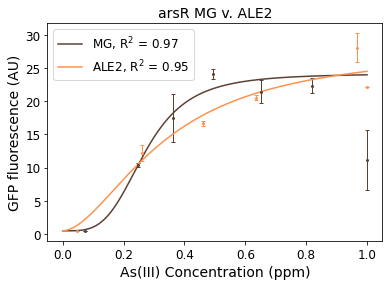

In [24]:
### arsR_MG hillcurve ###

# Copy stats so downstream operations don't mutate the original dataframe
arsR_MG_fold = arsR_MG_stats.copy()

# Compute mean and standard deviation of fold_gfp grouped by inducer concentration
arsR_MG_hill = arsR_MG_fold.groupby("conc").mean()
arsR_MG_hill_err = arsR_MG_fold.groupby("conc").std()

# These are computed in the original code (not used later); keeping to preserve behavior
a = np.max(arsR_MG_hill["fold_gfp"])
b = arsR_MG_hill["fold_gfp"][0]

# Fit the Hill (or other) model 'func' to the first 6 concentration points
x_mg = arsR_MG_hill.index.astype(float)[0:6]
y_mg = arsR_MG_hill["fold_gfp"][0:6]
popt, pcov = curve_fit(func, x_mg, y_mg)

# --- Calculate R-squared on the same 6 points used for fitting ---
yhat_mg = func(x_mg, *popt)
residuals = y_mg - yhat_mg
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_mg - np.mean(y_mg))**2)
r_sq = 1 - (ss_res / ss_tot)
MGr_sq = round(r_sq, 2)

# Plot fitted curve (dense sampling for smooth line)
x_dense = np.linspace(0, endpt, 10000)
plt.plot(x_dense, func(x_dense, popt[0], popt[1]), color="#5C4033")

# Plot mean points with error bars (std dev)
plt.errorbar(
    np.array(arsR_MG_hill.index.astype(float)),
    np.array(arsR_MG_hill["fold_gfp"]),
    yerr=np.array(arsR_MG_hill_err["fold_gfp"]),
    color="#5C4033",
    markersize=4,
    elinewidth=1,
    mew=1,
    capsize=2,
    fmt=".",
    label="MG",
)


### arsR_ALE2 hillcurve ###

# Copy stats so downstream operations don't mutate the original dataframe
arsR_ALE2_fold = arsR_ALE2_stats.copy()

# Compute mean and standard deviation of fold_gfp grouped by inducer concentration
arsR_ALE2_hill = arsR_ALE2_fold.groupby("conc").mean()
arsR_ALE2_hill_err = arsR_ALE2_fold.groupby("conc").std()

# These are computed in the original code (not used later); keeping to preserve behavior
a = np.max(arsR_ALE2_hill["fold_gfp"])
b = arsR_ALE2_hill["fold_gfp"][0]

# Fit the model 'func' to the first 6 concentration points
x_ale2 = arsR_ALE2_hill.index.astype(float)[0:6]
y_ale2 = arsR_ALE2_hill["fold_gfp"][0:6]
popt, pcov = curve_fit(func, x_ale2, y_ale2)

# --- Calculate R-squared on the same 6 points used for fitting ---
yhat_ale2 = func(x_ale2, *popt)
residuals = y_ale2 - yhat_ale2
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_ale2 - np.mean(y_ale2))**2)
r_sq = 1 - (ss_res / ss_tot)
ALE2r_sq = round(r_sq, 2)

# Plot fitted curve
x_dense = np.linspace(0, endpt, 10000)
plt.plot(x_dense, func(x_dense, popt[0], popt[1]), color="#ff924c")

# Plot mean points with error bars (std dev)
plt.errorbar(
    np.array(arsR_ALE2_hill.index.astype(float)),
    np.array(arsR_ALE2_hill["fold_gfp"]),
    yerr=np.array(arsR_ALE2_hill_err["fold_gfp"]),
    color="#ff924c",
    markersize=4,
    elinewidth=1,
    mew=1,
    capsize=2,
    fmt=".",
    label="R3",
)


### Plot adjustments ###

plt.legend(
    ["MG, R$^2$ = " + str(MGr_sq), "ALE2, R$^2$ = " + str(ALE2r_sq)],
    fontsize=12,
    loc="upper left",
)
plt.title("arsR MG v. ALE2", size=14)
plt.xlabel("As(III) Concentration (ppm)", size=14)
plt.ylabel("GFP fluorescence (AU)", size=14)
plt.xticks(size=12)
plt.yticks(size=12)


### Max response rate

(array([ 0.,  5., 10., 15., 20., 25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

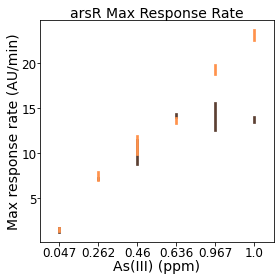

In [28]:
# Create a single-panel figure/axis with tight layout (preserves spacing behavior)
fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.set_figheight(4)
fig.set_figwidth(4)

# ---- MG response rate pointplot ----
# Determine plotting order (reverse of unique conc values), cast to float
MGorder = arsR_MG_stats["conc"].unique()[::-1].astype(float)

# Ensure the concentration column is numeric for plotting (matches original behavior)
arsR_MG_stats["conc"] = arsR_MG_stats["conc"].astype(float)

# Plot ramp vs concentration as points (no connecting lines)
sns.pointplot(
    x="conc",
    y="ramp",
    data=arsR_MG_stats,
    color="#5C4033",
    join=False,
    order=MGorder,
    ax=ax,
    scale=0,
)

# ---- ALE2 ramp pointplot ----
# Determine plotting order (reverse of unique conc values), cast to float
ALE2order = arsR_ALE2_stats["conc"].unique()[::-1].astype(float)

# Ensure the concentration column is numeric for plotting (matches original behavior)
arsR_ALE2_stats["conc"] = arsR_ALE2_stats["conc"].astype(float)

# Plot ramp vs concentration as points (no connecting lines)
sns.pointplot(
    x="conc",
    y="ramp",
    data=arsR_ALE2_stats,
    color="#ff924c",
    join=False,
    order=ALE2order,
    ax=ax,
    scale=0,
)

# ---- Plot formatting (kept identical) ----
plt.title("arsR Max Response Rate", size=14, pad=2)
plt.xlabel("As(III) (ppm)", size=14, labelpad=0)
plt.ylabel("Max response rate (AU/min)", size=14, labelpad=0)

plt.tick_params(axis="x", pad=0)
plt.xticks(size=12)

plt.tick_params(axis="y", pad=0)
plt.yticks(size=12)


### Relaxation constant

(array([ 20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

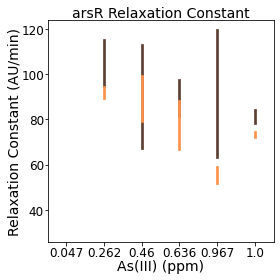

In [30]:
# Create a single-panel figure and axis with tight layout
fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.set_figheight(4)
fig.set_figwidth(4)

# ---- MG relaxation constant point plot ----
# Determine plotting order, excluding the 0.074 ppm condition (string comparison preserved)
MGorder = (
    arsR_MG_stats.loc[arsR_MG_stats["conc"] != "0.074"]["conc"]
    .unique()[::-1]
    .astype(float)
)

# Ensure concentration values are numeric for plotting
arsR_MG_stats["conc"] = arsR_MG_stats["conc"].astype(float)

# Plot MG relaxation constants, excluding 0.074 ppm
sns.pointplot(
    x="conc",
    y="relax",
    data=arsR_MG_stats.loc[arsR_MG_stats["conc"] != 0.074],
    color="#5C4033",
    join=False,
    order=MGorder,
    ax=ax,
    scale=0,
)

# ---- ALE2 relaxation constant point plot ----
# Determine plotting order, excluding the 0.047 ppm condition (string comparison preserved)
ALE2order = (
    arsR_ALE2_stats.loc[arsR_ALE2_stats["conc"] != "0.047"]["conc"]
    .unique()[::-1]
    .astype(float)
)

# Ensure concentration values are numeric for plotting
arsR_ALE2_stats["conc"] = arsR_ALE2_stats["conc"].astype(float)

# Plot ALE2 relaxation constants, excluding 0.047 ppm
sns.pointplot(
    x="conc",
    y="relax",
    data=arsR_ALE2_stats.loc[arsR_ALE2_stats["conc"] != 0.047],
    color="#ff924c",
    join=False,
    order=ALE2order,
    ax=ax,
    scale=0,
)

# ---- Plot formatting (kept identical) ----
plt.title("arsR Relaxation Constant", size=14, pad=2)
plt.xlabel("As(III) (ppm)", size=14, labelpad=0)
plt.ylabel("Relaxation Constant (AU/min)", size=14, labelpad=0)

plt.tick_params(axis="x", pad=0)
plt.xticks(size=12)

plt.tick_params(axis="y", pad=0)
plt.yticks(size=12)
